In [74]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import json
%config InlineBackend.figure_format='retina'

## KC data processing

center=(-122.30174365821095, 47.61729305740989)


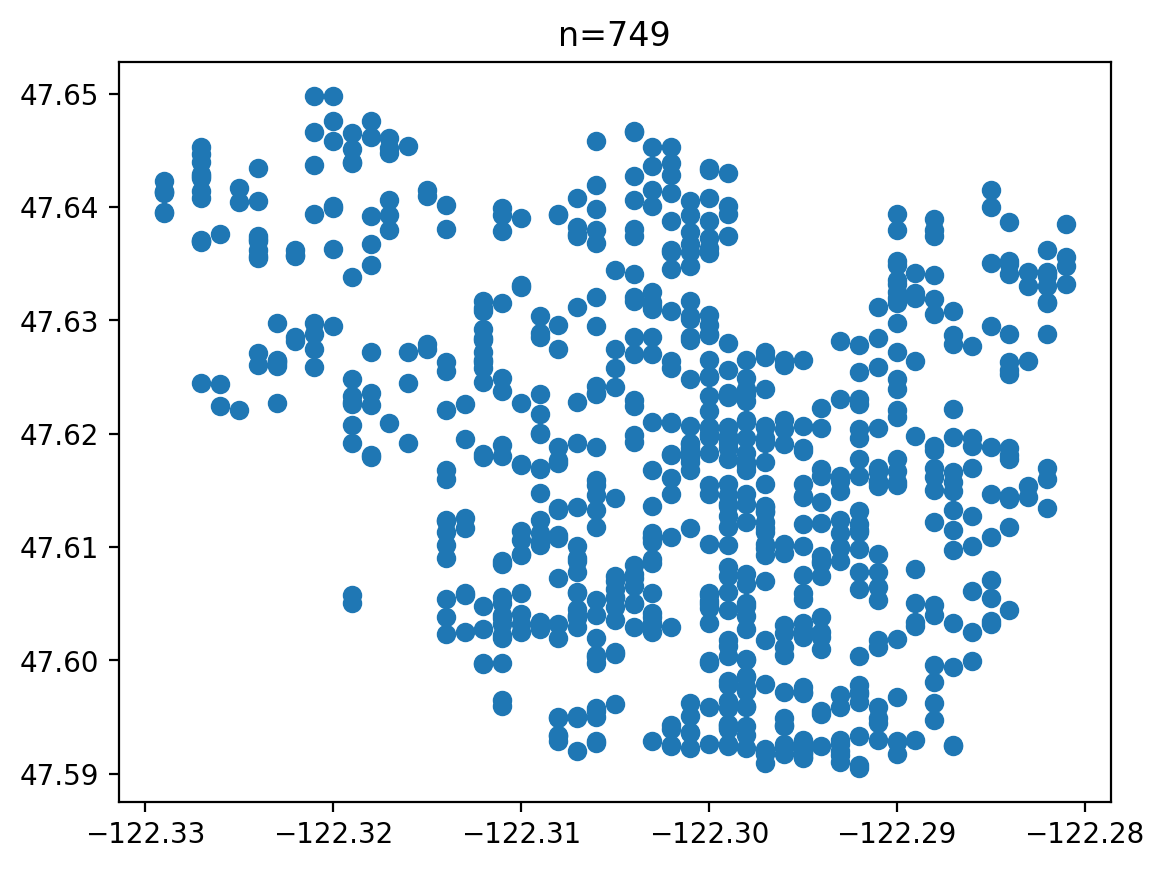

In [75]:
# 1. load data and drop duplicate locations
df=pd.read_csv('kc_house_data.csv')
df.drop_duplicates(subset=['lat','long'],inplace=True)

# 2. restrict data
def inBounds(lat,long):
    return lat<47.65 and lat>47.59 and long>-122.33 and long<-122.28 and (lat > -0.925*long - 65.547)
df=df[df.apply(lambda x: inBounds(x['lat'],x['long']),axis=1)]
fig,ax=plt.subplots()
ax.set_title(f'n={len(df)}')
ax.scatter(df['long'],df['lat'])

# 3. save data
df.to_csv('kc_house_sample.csv')
print(f"center={df['long'].mean(),df['lat'].mean()}")

In [76]:
# 4. load predictions (after AGWR)
pred=pd.read_csv('kc_predictions.csv')
df['predicted']=pred['predicted'].values

# 5. load coefficients
with open('coefficients.pkl', 'rb') as file:
    coefficients = pickle.load(file)
coefficient_min = coefficients.min(axis=0)
coefficient_median = np.median(coefficients,axis=0)
coefficient_max = coefficients.max(axis=0)
print('coefficient min',list(map(lambda x:json.loads(json.dumps(x)),coefficient_min)))
print('coefficient median',list(map(lambda x:json.loads(json.dumps(x)),coefficient_median)))
print('coefficient max',list(map(lambda x:json.loads(json.dumps(x)),coefficient_max)))

# 6. print bandwidths
with open('kc_model.pkl','rb') as file:
    model = pickle.load(file)
print(model.spatial_learners[-1].bandwidths)

# 7. print data in JSON
def toJSON(df):
    i=0
    for index,row in df.iterrows():
        print('{latitude:',row['lat'],
              ', longitude:',row['long'],
              ',actual:',row['price'],
              ',predicted:',int(row['predicted']),
              ',coefficients:',list(map(lambda x:json.loads(json.dumps(x)),coefficients[i])),
              '},')
        i+=1

toJSON(df)

coefficient min [-11114.780642817059, -24017.157813739635, -20448.966999212134, 26.94703873349016, -5.604742958699164, 3823.8600268015475]
coefficient median [16527.38725505567, -18565.847552309893, -18461.07158339589, 28.594754041312317, -1.1587082805843687, 11322.534675766432]
coefficient max [20502.353129944542, -17367.94099677417, -12428.963096090125, 52.82889752060971, 6.412710252219354, 14025.925752420671]
[ 80  75 110  57  22 131]
{latitude: 47.6221 , longitude: -122.314 ,actual: 667000.0 ,predicted: 652390 ,coefficients: [8295.719311631268, -19318.085353601324, -14947.702810965155, 39.09191083639571, -1.6665790308088877, 7290.940997871696] },
{latitude: 47.6113 , longitude: -122.297 ,actual: 425000.0 ,predicted: 425315 ,coefficients: [17286.70553966995, -18487.25323890187, -19046.902181871723, 27.654501629642876, -1.1992037417041566, 12135.23502646504] },
{latitude: 47.6415 , longitude: -122.315 ,actual: 850830.0 ,predicted: 855797 ,coefficients: [-2365.3423227973108, -21616.29

## NY data processing

center=(-73.88455175068744, 40.84830495875344)


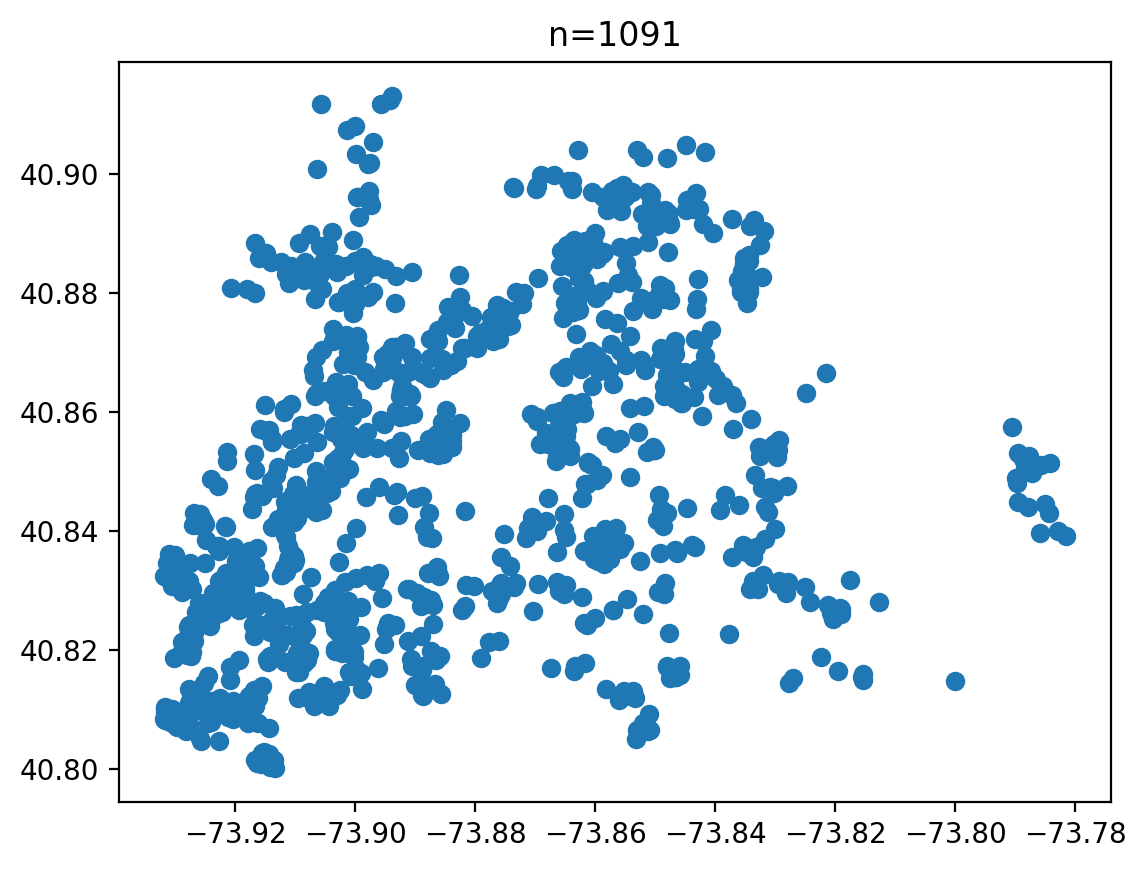

In [72]:
# 1. load data and drop duplicate locations
df=pd.read_csv('AB_NYC_2019.csv')
df.drop_duplicates(subset=['latitude','longitude'],inplace=True)

# 2. restrict data
df=df[df.apply(lambda x: x['neighbourhood_group']=='Bronx',axis=1)]
fig,ax=plt.subplots()
ax.set_title(f'n={len(df)}')
ax.scatter(df['longitude'],df['latitude'])

# 3. replace NaN with 0 in reviews_per_month
df['reviews_per_month'].fillna(0,inplace=True)

# 3. save data
df.to_csv('ny_airbnb_sample.csv')
print(f"center={df['longitude'].mean(),df['latitude'].mean()}")

In [73]:
# 4. load predictions (after AGWR)
pred=pd.read_csv('ny_predictions.csv')
df['predicted']=pred['predicted'].values

# 5. load coefficients
with open('coefficients.pkl', 'rb') as file:
    coefficients = pickle.load(file)
coefficient_min = coefficients.min(axis=0)
coefficient_median = np.median(coefficients,axis=0)
coefficient_max = coefficients.max(axis=0)
print('coefficient min',list(map(lambda x:json.loads(json.dumps(x)),coefficient_min)))
print('coefficient median',list(map(lambda x:json.loads(json.dumps(x)),coefficient_median)))
print('coefficient max',list(map(lambda x:json.loads(json.dumps(x)),coefficient_max)))

# 6. print bandwidths
with open('ny_model.pkl','rb') as file:
    model = pickle.load(file)
print(model.spatial_learners[-1].bandwidths)

# 6. print data in JSON
def toJSON(df):
    i=0
    for index,row in df.iterrows():
        print('{latitude:',row['latitude'],
              ', longitude:',row['longitude'],
              ',actual:',row['price'],
              ',predicted:',int(row['predicted']),
              ',coefficients:',list(map(lambda x:json.loads(json.dumps(x)),coefficients[i])),
              '},')
        i+=1

toJSON(df)

coefficient min [-1.025566757992119, -1.029546196431715, -0.030425886972717617, -0.7990746179001041, -0.7504000742423735, -0.010491653561903047]
coefficient median [0.6751060083710175, -0.11537472507188155, -0.022241175226534893, -0.25461638408853976, -0.5210900974662811, 0.005050454190231562]
coefficient max [1.349974797470364, 0.13402206111377363, -0.012583397615402742, 0.13949964843336735, 0.29760664983721025, 0.015375290367858315]
[300  31 280 130 300  27]
{latitude: 40.83232 , longitude: -73.93184 ,actual: 40 ,predicted: 44 ,coefficients: [1.1783710664229445, 0.028505391773804057, -0.01712372197976238, 0.03236258215190444, -0.7343483395371465, 0.004084450369875144] },
{latitude: 40.83075 , longitude: -73.93058 ,actual: 45 ,predicted: 80 ,coefficients: [1.1884565236120046, 0.023911651855508725, -0.016838929359160253, 0.06890520441040134, -0.7354232055792069, 0.0042035562162958656] },
{latitude: 40.81309 , longitude: -73.85514 ,actual: 90 ,predicted: 106 ,coefficients: [-0.662980106

In [68]:
def gaussian(zs):
	return np.exp(-0.5 * (zs)**2)